# k-NN Tree classifier - Small dataset

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

## Load Data

In [2]:
DATA_DIR = '../../data/raw/small/'

In [3]:
import pandas as pd

train_data = pd.read_csv(DATA_DIR + 'train.csv')

train_data.info()
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35187 entries, 0 to 35186
Columns: 113 entries, Unnamed: 0 to phishing
dtypes: float64(1), int64(112)
memory usage: 30.3 MB


,Unnamed: 0,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,48447,1,1,2,2,0,2,0,1,0,...,1,3,7,596,1,0,0,0,0,1
1,15870,2,1,1,1,0,1,0,0,0,...,1,4,5,298,1,0,0,0,0,1
2,10116,2,1,0,3,0,0,0,0,0,...,1,2,0,299,0,1,0,0,0,1
3,35024,4,1,0,5,0,0,0,0,0,...,1,2,1,13785,1,0,0,0,0,1
4,10527,1,0,0,0,0,0,0,0,0,...,2,2,1,299,1,1,0,0,0,0


In [4]:
valid_data = pd.read_csv(DATA_DIR + 'valid.csv')

valid_data.info()
valid_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11729 entries, 0 to 11728
Columns: 113 entries, Unnamed: 0 to phishing
dtypes: float64(1), int64(112)
memory usage: 10.1 MB


,Unnamed: 0,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,5530,24,0,5,2,0,7,0,6,0,...,2,2,0,292,1,0,0,0,0,1
1,26042,3,0,0,1,0,0,0,0,0,...,1,4,0,226,0,1,0,0,0,0
2,11465,1,0,0,1,0,0,0,0,0,...,1,3,5,3074,1,1,0,0,0,0
3,44270,4,0,0,1,0,0,0,0,0,...,1,2,1,12085,0,0,0,0,0,1
4,43619,2,0,0,1,0,0,0,0,0,...,1,3,1,3598,0,0,0,0,0,0


In [5]:
test_data = pd.read_csv(DATA_DIR + 'test.csv')

test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11729 entries, 0 to 11728
Columns: 113 entries, Unnamed: 0 to phishing
dtypes: float64(1), int64(112)
memory usage: 10.1 MB


,Unnamed: 0,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,14279,1,0,0,3,0,0,0,0,0,...,1,2,1,3591,1,1,0,0,0,1
1,8166,1,0,0,2,0,0,0,0,0,...,-1,4,0,-1,0,-1,0,0,0,1
2,4974,2,0,0,0,0,0,0,0,0,...,1,2,1,1947,1,0,0,0,0,0
3,13812,3,1,0,7,0,1,1,0,0,...,1,2,1,21568,0,0,0,0,0,1
4,30581,1,0,0,0,0,0,0,0,0,...,1,2,1,7192,0,1,0,0,0,0


## Get X and y data

In [6]:
TARGET_COL_NAME = 'phishing'

In [7]:
X_train = train_data.drop(TARGET_COL_NAME, axis=1)
y_train = train_data[TARGET_COL_NAME]

In [8]:
y_train.value_counts()

1    18388
0    16799
Name: phishing, dtype: int64

In [9]:
X_valid = valid_data.drop(TARGET_COL_NAME, axis=1)
y_valid = valid_data[TARGET_COL_NAME]

In [10]:
y_valid.value_counts()

1    6129
0    5600
Name: phishing, dtype: int64

In [11]:
X_test = test_data.drop(TARGET_COL_NAME, axis=1)
y_test = test_data[TARGET_COL_NAME]

In [12]:
y_test.value_counts()

1    6130
0    5599
Name: phishing, dtype: int64

## Hyperparameter tuning

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

# Grid search over hyperparameters
neighbors_cnts = [1, 3, 5, 10, 20, 30]

for neighbors_cnt in neighbors_cnts:
    print('Neighbors count: {}'.format(neighbors_cnt))

    clf = KNeighborsClassifier(n_neighbors=neighbors_cnt, n_jobs=-1)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_valid)

    print('Validation data - Accuracy: {:.3f}, Balanced accuracy: {:.3f}, F1: {:.3f}, Precision: {:.3f}, Recall: {:.3f}'
          .format(accuracy_score(y_valid, y_pred),
                  balanced_accuracy_score(y_valid, y_pred),
                  f1_score(y_valid, y_pred),
                  precision_score(y_valid, y_pred),
                  recall_score(y_valid, y_pred)))
    print('-' * 20)

Neighbors count: 1
Validation data - Accuracy: 0.694, Balanced accuracy: 0.693, F1: 0.708, Precision: 0.705, Recall: 0.711
--------------------
Neighbors count: 3
Validation data - Accuracy: 0.713, Balanced accuracy: 0.712, F1: 0.729, Precision: 0.719, Recall: 0.740
--------------------
Neighbors count: 5
Validation data - Accuracy: 0.720, Balanced accuracy: 0.718, F1: 0.737, Precision: 0.723, Recall: 0.751
--------------------
Neighbors count: 10
Validation data - Accuracy: 0.722, Balanced accuracy: 0.722, F1: 0.730, Precision: 0.740, Recall: 0.721
--------------------
Neighbors count: 20
Validation data - Accuracy: 0.724, Balanced accuracy: 0.722, F1: 0.742, Precision: 0.725, Recall: 0.759
--------------------
Neighbors count: 30
Validation data - Accuracy: 0.728, Balanced accuracy: 0.726, F1: 0.750, Precision: 0.723, Recall: 0.778
--------------------


## Retrain the best model - training + validation dataset

In [14]:
best_neighbors_cnt = 5

In [15]:
X_train_and_valid = pd.concat([X_train, X_valid])
X_train_and_valid.shape

(46916, 112)

In [16]:
y_train_and_valid = pd.concat([y_train, y_valid])
y_train_and_valid.shape

(46916,)

In [17]:
best_clf = KNeighborsClassifier(n_neighbors=best_neighbors_cnt, n_jobs=-1)

best_clf.fit(X_train_and_valid, y_train_and_valid)

KNeighborsClassifier(n_jobs=-1)

## Save trained model

In [18]:
from joblib import dump

dump(best_clf, "../../models/knn_small_model.pkl") 

['../../models/knn_small_model.pkl']

## Evaluate on test data

In [19]:
from sklearn.metrics import matthews_corrcoef, roc_curve

def fpr(y_true, y_pred, sample_weight=None):
    return roc_curve(y_true, y_pred, sample_weight=sample_weight)[0][1]

METRICS = [
    ('F1', f1_score),
    ('Accuracy', accuracy_score),
    ('Balanced accuracy', balanced_accuracy_score),
    ('MCC', matthews_corrcoef),
    ('Precision', precision_score),
    ('Recall', recall_score),
    ('FPR', fpr)
]

In [20]:
y_pred = best_clf.predict(X_test)

Metric values:

F1: 0.748
Accuracy: 0.733
Balanced accuracy: 0.732
MCC: 0.464
Precision: 0.737
Recall: 0.760
FPR: 0.297




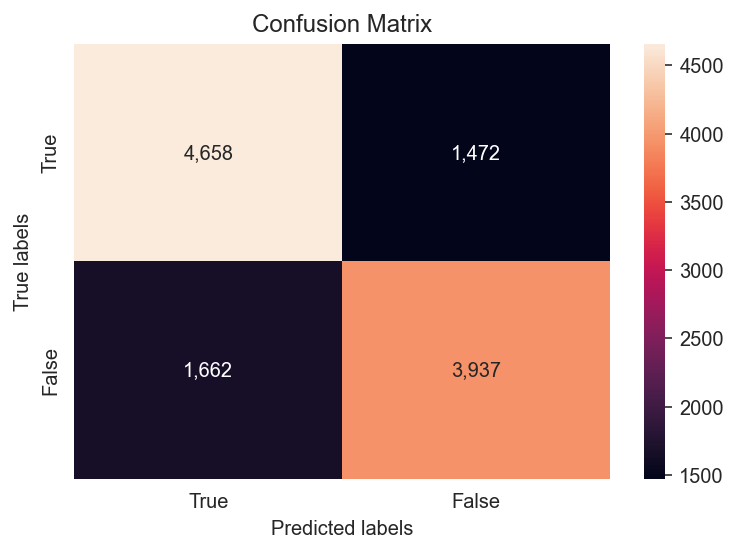

In [21]:
from bin.evaluation.evaluation import evaluate_classifier

evaluate_classifier(y_test, y_pred, y_pred, METRICS)